# Read/process relevant IR images 

In [1]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
import kray
# OS interaction
import sys, pickle, os
# import subplots function for plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph
import matplotlib.gridspec as gridspec


# --------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dirPre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dirPre = '/Users/karllapo/gdrive/'
# Project directory
dirProj = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/'
# Directory for printing figures
dirPrint = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ/IRCamera'
# IR camera images directory (selected images, not all)
dirIRData = dirPre + 'GroundObs/Snoqualmie/IRCamera/SNQ.Tsfc.IR'
# Met data directory
dirData = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'

# --------------------------------------------------------------------------------------------
# Global formatting
sns.set_context('poster')
sns.set_style('whitegrid')
# must insert this statement to render the plots within the notebook
%matplotlib inline

In [2]:
# Met observations
os.chdir(dirData)
support = xr.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')

In [3]:
# -------------------------------------------------------------------------------------------------------
imageList = os.listdir(dirIRData)
imageList = [imList.split('.')[0] for imList in imageList if len(imList.split('.')[0]) > 0]
imageList = np.unique(imageList)

In [4]:
# -------------------------------------------------------------------------------------------------------
# Dates and field notes for each IR image
imageListDate = {'AA012801': datetime(2014,1,28,11,0,0),
                 'AA012802': datetime(2014,1,28,11,0,0),
                 'AA020601': datetime(2014,2,6,8,0,0),
                 'AA021108': datetime(2014,2,11,13,0,0),
                 'AA021109': datetime(2014,2,11,13,0,0),
                 'AA021110': datetime(2014,2,11,13,0,0),
                 'AA120419': datetime(2014,12,4,8,0,0),
                 'AB020507': datetime(2014,2,5,7,0,0),
                 'AB020508': datetime(2014,2,5,7,0,0),
                 'AB020509': datetime(2014,2,5,7,0,0),
                 'AC020501': datetime(2014,2,5,7,30,0),
                 'AC122900': datetime(2014,12,30,8,0,0),
                 'AC122902': datetime(2014,12,30,8,0,0),
                 'AC122903': datetime(2014,12,30,8,0,0),
                 'AC122905': datetime(2014,12,30,8,0,0),
                 'AC122906': datetime(2014,12,30,8,0,0),
                 'AC122907': datetime(2014,12,30,8,0,0),
                 'AC122908': datetime(2014,12,30,8,0,0),
                }

imageListNotes = {'AA012801': 'Snow Hydro field trip. Freezing rain. Hoar on CSAT. Tsfc ~ -4.5, Tair ~ 0',
                  'AA012802': 'Snow Hydro field trip. Freezing rain. Hoar on CSAT. Tsfc ~ -4.5, Tair ~ 0',
                  'AA020601': 'Air = -15.8 C, Tsrf = -21 C',
                  'AA021108': 'Signs of melting',
                  'AA021109': 'Signs of melting',
                  'AA120419': 'Tsrf ~-11.2C, Air temp -9C. ',
                  'AB020507': 'Air temperature around -14 C (aprox), Surface tempa round -23 to -14 C (aprox)',
                  'AB020508': 'Air temperature around -14 C (aprox), Surface tempa round -23 to -14 C (aprox)',
                  'AB020509': 'Air temperature around -14 C (aprox), Surface tempa round -23 to -14 C (aprox)',
                  'AC020501': 'Air temperature around -14 C (aprox), Surface tempa round -23 to -14 C (aprox)',
                  'AC122900': 'Guess on the time, no field notes from Nic',
                  'AC122902': 'Guess on the time, no field notes from Nic',
                  'AC122903': 'Guess on the time, no field notes from Nic',
                  'AC122905': 'Guess on the time, no field notes from Nic',
                  'AC122906': 'Guess on the time, no field notes from Nic',
                  'AC122907': 'Guess on the time, no field notes from Nic',
                  'AC122908': 'Guess on the time, no field notes from Nic',
                  }

In [6]:
####################################################################################################
# Convert IR images to bmp format
####################################################################################################
# *.irb converted to .txt files of 4 columns:
# ID  y-pixel x-pixel   Brightness temperature (F)
datatype = [('ID', 'int'),
            ('yp', 'int'),
            ('xp', 'int'),
            ('tb', 'float64')]

# for image in imageList:
#     # Load ascii file
#     IR_image = image + '.txt'
#     os.chdir(dirIRData)
    
#     d = np.loadtxt(IR_image, dtype=datatype)
#     brighttemp = (d['tb'] - 32.) * 5./9.  # Convert to Celsius
#     # Reshape to a raster
#     Tbright = brighttemp.reshape(d['yp'].max(), d['xp'].max(), order='C')

#     # Plot
#     fig,ax = plt.subplots(1,1,figsize=(6.5,4))
#     cmin = max(-30, np.floor(Tbright.min()))
#     cmax = min(np.ceil(Tbright.max()), 10)
#     tsp = np.linspace(cmin, cmax, 13)
#     cmap = kgraph.cmap_discretize(cm.viridis, 13)
#     im = ax.imshow(Tbright, interpolation='nearest', cmap=cmap,
#                    vmin=cmin, vmax=cmax)
#     # Remove x and y axis
#     ax.set_axis_off()

#     # Add colorbar, make sure to specify tick locations to match desired ticklabels
#     from mpl_toolkits.axes_grid1 import make_axes_locatable
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", "5%", pad="3%")
#     cbar = plt.colorbar(im, cax=cax, ticks=tsp)
#     tsp = ["%.1f" % t for t in tsp]
#     _out = cbar.ax.set_yticklabels(tsp) 
#     os.chdir(dirPrint)
#     fig.savefig(image + '.pdf')
#     plt.close(fig)

//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


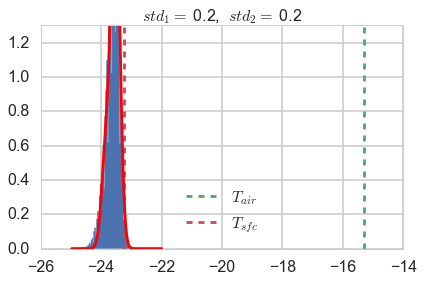

In [61]:
# This section requires inspection by eye in order to select appropriate starting parameter 
# values for the double gaussian fit

from sklearn import mixture
import matplotlib.mlab
from pylab import *
from scipy.optimize import leastsq

def double_gaussian( x, params ):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

def double_gaussian_fit( params ):
    fit = double_gaussian( x, params )
    return (fit - y)

datatype = [('ID', 'int'),
            ('yp', 'int'),
            ('xp', 'int'),
            ('tb', 'float64')]

# To reproduce the figures in the Graphics folder, initial conditions for the fit needs to be determined through 
# an iteration of inspection and fitting
for image in imageList[0]:
    # IR camera data
    IR_image = image + '.txt'
    os.chdir(dirIRData)
    d = np.loadtxt(IR_image, dtype=datatype)
    brighttemp = (d['tb'] - 32.) * 5./9.  # Convert to Celsius

    # Histogram - counts and bins
    fig, ax = plt.subplots(1,1,figsize=(6.5,4))
    cmin = max(-30, np.floor(brighttemp.min()))
    cmax = min(np.ceil(brighttemp.max()), 10.)
    tsp = np.linspace(cmin, cmax, 100)
    n, bins, _ = ax.hist(brighttemp, bins=tsp, normed=True, fill=True, histtype='step')

    # Air and surface temperature
    d = imageListDate[image]
    airTemp = support.T6.sel(time=d).values
    sfcTemp = support.Tsrf.sel(time=d).values
    ax.plot([airTemp, airTemp], [0, 2.], '--', label='$T_{air}$')
    ax.plot([sfcTemp, sfcTemp], [0, 2.], '--', label='$T_{sfc}$')

    # Least squares fit for double gaussian. Starting values found by inspection.
    y = n
    x = bins[:-1] + np.diff(bins)
    params = [1, x[y == max(y)], 1.0, 1, -25, 1.0]
    fit = leastsq( double_gaussian_fit, params )
    ax.plot(x, double_gaussian( x, fit[0] ), c='r')

    # Formatting
    ax.set_title('$std_1=$ ' + str("%.1f" % fit[0][2])
                 + ',  $std_2=$ '+str("%.1f" % fit[0][5]),
                 fontsize=16)
    ax.set_ylim(0,min(1.3, max(y)))
    ax.legend(loc='best', )

    os.chdir(dirPrint)
    fig.savefig(image + '.hist.pdf')


## Test Brightness temperature adjustment
1) Emissivity correction with angular dependence  
2) Environmental contribution

In [6]:
np.arctan(1.5/10.)

0.14888994760949725